# John Pezzuto - PS 4

In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

## 1a) 

In [2]:
rho = 0.85
mu = 11.4
T = 500
sigma = 0.7
z = np.zeros(500)
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [3]:
z_vec = np.empty(T)

for i in range(T):
    if i == 0:
        z = rho
    else:
        z = rho*z_vec[i-1] + (1-rho)*mu + eps_vec[i]
    
    z_vec[i] = z
z_orig_vec = z_vec

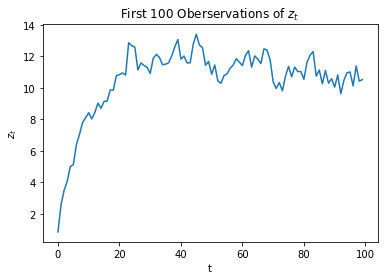

In [4]:
plt.plot(z_vec[:100])
plt.title("First 100 Oberservations of $z_t$")
plt.ylabel("$z_t$")
plt.xlabel("t")
plt.show()

## 1b)

In [5]:
lower = mu - 3*sigma
upper = mu + 3*sigma
z_vals = np.array([lower,(mu-lower)/2+lower,mu,(upper-mu)/2+mu,upper])
z_vals

array([  9.3 ,  10.35,  11.4 ,  12.45,  13.5 ])

## 1c)

In [6]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_cuts

array([  9.825,  10.875,  11.925,  12.975])

In [7]:
z_bins = np.empty(T)

for i in range(T):
    if z_vec[i] <= z_cuts[0]:
        z_bins[i] = 0
    
    elif z_vec[i] <= z_cuts[1]:
        z_bins[i] = 1
    
    elif z_vec[i] <= z_cuts[2]:
        z_bins[i] = 2
        
    elif z_vec[i] <= z_cuts[3]:
        z_bins[i] = 3       
    else:
        z_bins[i] = 4



In [8]:
trans_counts = np.zeros(shape=(5,5))

for i in range(T):
    cur_bin = int(z_bins[i])
    if i == 0:
        continue
    assert i >= 1
    
    prev_bin = int(z_bins[i-1])
    
    
    trans_counts[prev_bin][cur_bin] += 1

assert np.sum(trans_counts) == T-1


P_hat = trans_counts / ( trans_counts.sum(axis=1).reshape(5,1) )
print("Transition matrix is:")
P_hat

Transition matrix is:


array([[ 0.75757576,  0.21212121,  0.03030303,  0.        ,  0.        ],
       [ 0.09821429,  0.51785714,  0.33928571,  0.04464286,  0.        ],
       [ 0.03184713,  0.22292994,  0.47770701,  0.23566879,  0.03184713],
       [ 0.        ,  0.04273504,  0.34188034,  0.5042735 ,  0.11111111],
       [ 0.        ,  0.        ,  0.04255319,  0.34042553,  0.61702128]])

## 1d)

In [9]:
init_state = np.array([0, 0, 1, 0, 0]).reshape(5,1)
prob_two_steps = LA.matrix_power(P_hat.T, 2) @ init_state
print("The probability of going from state 3 to state 5 over 2 steps is:", prob_two_steps[4][0])

The probability of going from state 3 to state 5 over 2 steps is: 0.0610493791461


## 1e)

In [10]:
eigvals, eigvecmat = LA.eig(P_hat.T)
eigvals

array([ 0.10863411,  1.        ,  0.36552089,  0.79420747,  0.60607221])

In [11]:
eigvecmat

array([[-0.020458  ,  0.27536596,  0.15283646,  0.70399635,  0.41553059],
       [ 0.39080083,  0.4672877 , -0.67301232,  0.32001452, -0.44781476],
       [-0.78833401,  0.65503722,  0.19402516, -0.17714005, -0.5957381 ],
       [ 0.47170014,  0.48814875,  0.62829709, -0.50091491,  0.12076725],
       [-0.05370896,  0.19609394, -0.30214639, -0.34595592,  0.50725502]])

In [12]:
eigvec = eigvecmat[:, 1] / eigvecmat[:, 1].sum()
stat_dist = eigvec
print("The stationary (long-run, ergodic) distribution of Z is:")
stat_dist


The stationary (long-run, ergodic) distribution of Z is:


array([ 0.13226453,  0.2244489 ,  0.31462926,  0.23446894,  0.09418838])

## 1f)

In [13]:
z_0 = z_vals[2]
z_vec = np.empty(T)
z_t = z_0
zt_ind = 1
for t_ind in range(T):
    ztp1_ind = np.argwhere(unif_vec[t_ind] <= np.cumsum(P_hat[zt_ind, :])).min()
    
    z_tp1 = z_vals[ztp1_ind]
    z_vec[t_ind] = z_tp1
    
    z_t = z_tp1
    zt_ind = ztp1_ind


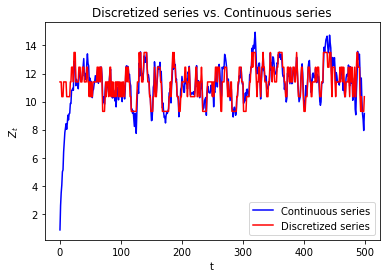

In [14]:
plt.plot(np.arange(T), z_orig_vec, color='blue', label='Continuous series')
plt.plot(np.arange(T), z_vec, color='red', label='Discretized series')
plt.title('Discretized series vs. Continuous series')
plt.xlabel('t')
plt.ylabel(r'$Z_t$')
plt.legend()
plt.show()